In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits import mplot3d
import math

# Funkcje celu

In [14]:
def rastrigin(x,y):
    return x**2 - 10*np.cos(2*math.pi*x) + 10 + y**2 - 10*np.cos(2*math.pi*y) + 10

def rosenbrock(x,y):
    return 100*(x**2 - y)**2 + (x - 1)**2

def sphere(x,y):
    return x**2 + y**2

name_func = {
    'Sphere': sphere,
    'Rosenbrock': rosenbrock,
    'Rastrigin': rastrigin
}

In [18]:
name = 'Rosenbrock'

f = name_func[name]

x = np.linspace(0, 2, 30)
y = np.linspace(0, 3, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

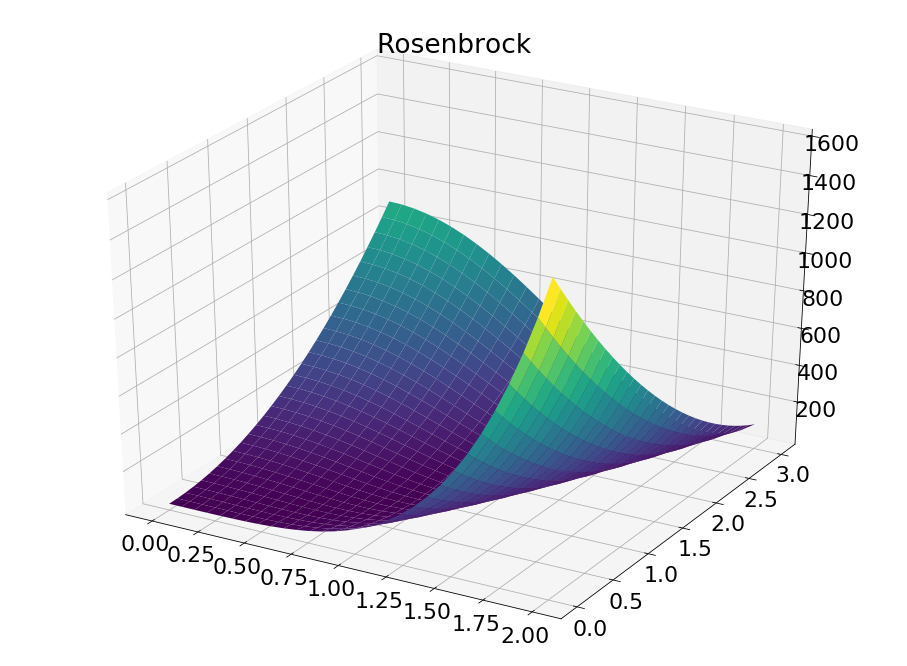

In [19]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title(name);
fig.savefig(f'figs\\{name}.png')

# Czas iteracji od 1 do 1000

In [105]:
# python dfs
py_cmaes = pd.read_csv("times_list_cmaes.csv")
py_de = pd.read_csv("times_list_de.csv")
py_des = pd.read_csv("times_list_des.csv")
py_dfs = [py_cmaes, py_de, py_des]

# r dfs
r_cmaes = pd.read_csv("cmaes_iter_time.csv")
r_de = pd.read_csv("de_iter_time.csv")
r_des = pd.read_csv("des_iter_time.csv")
r_dfs = [r_cmaes, r_de, r_des]

dfs = zip(py_dfs, r_dfs)

In [106]:
new_dfs = []
for df_pair in dfs:
    new_dfs.append(pd.concat([df_pair[0], df_pair[1]], axis=1))
    

In [107]:
alg_to_int = {'cmaes': 0,
             'de': 1,
             'des': 2}

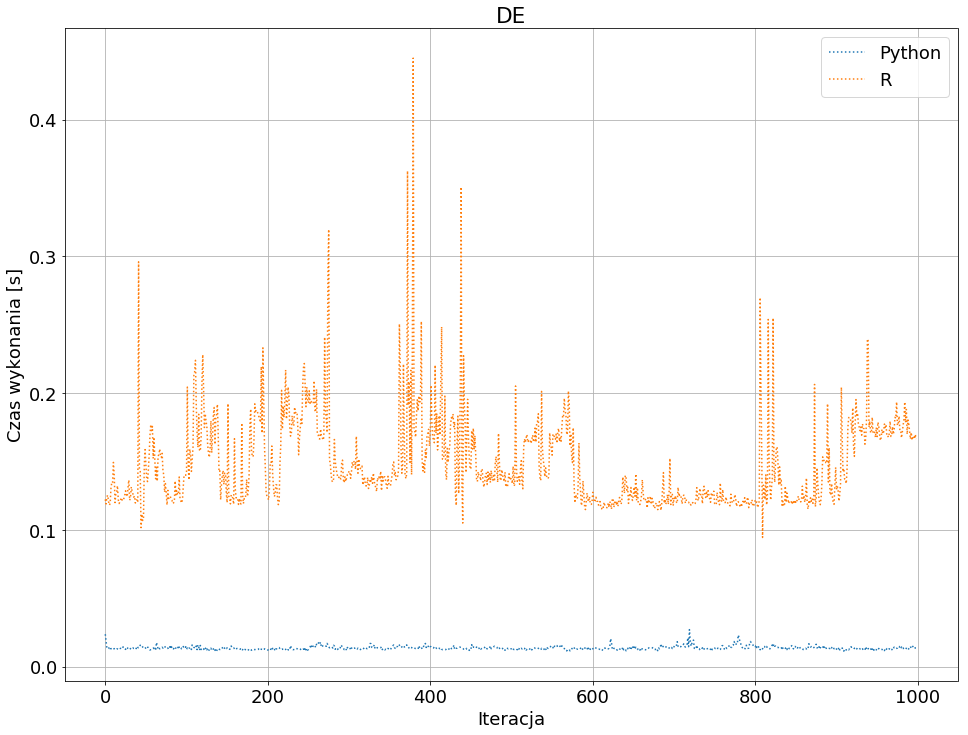

In [108]:
algorithm = 'de'
alg_id = alg_to_int[algorithm]

fig = plt.figure(figsize=(16, 12))
ax1 = plt.axes()
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Czas wykonania [s]')
ax1.plot(new_dfs[alg_id], ':')
ax1.grid()
ax1.legend(list(new_dfs[alg_id].columns))
ax1.set_title(algorithm.upper())
fig.savefig(f'figs\\eval_{algorithm}.png')

# Średni czas iteracji w zależności od wymiaru

In [2]:
# python dfs
py_cmaes = pd.read_csv("py_mean_time_per_dim_cmaes.csv",index_col=0)
py_de = pd.read_csv("py_mean_time_per_dim_de.csv",index_col=0)[:20]
py_des = pd.read_csv("py_mean_time_per_dim_des.csv",index_col=0)
py_dfs = [py_cmaes, py_de, py_des]

# r dfs
r_cmaes = pd.read_csv("r_mean_time_per_dim_cmaes.csv")
r_de = pd.read_csv("r_mean_time_per_dim_de.csv")
r_des = pd.read_csv("r_mean_time_per_dim_des.csv")
r_dfs = [r_cmaes, r_de, r_des]

dfs = zip(py_dfs, r_dfs)

In [3]:
new_dfs = []
for df_pair in dfs:
    new_dfs.append(df_pair[0].set_index('Dim').join(df_pair[1].set_index('Dim')))

In [4]:
alg_to_int = {'cmaes': 0,
             'de': 1,
             'des': 2}

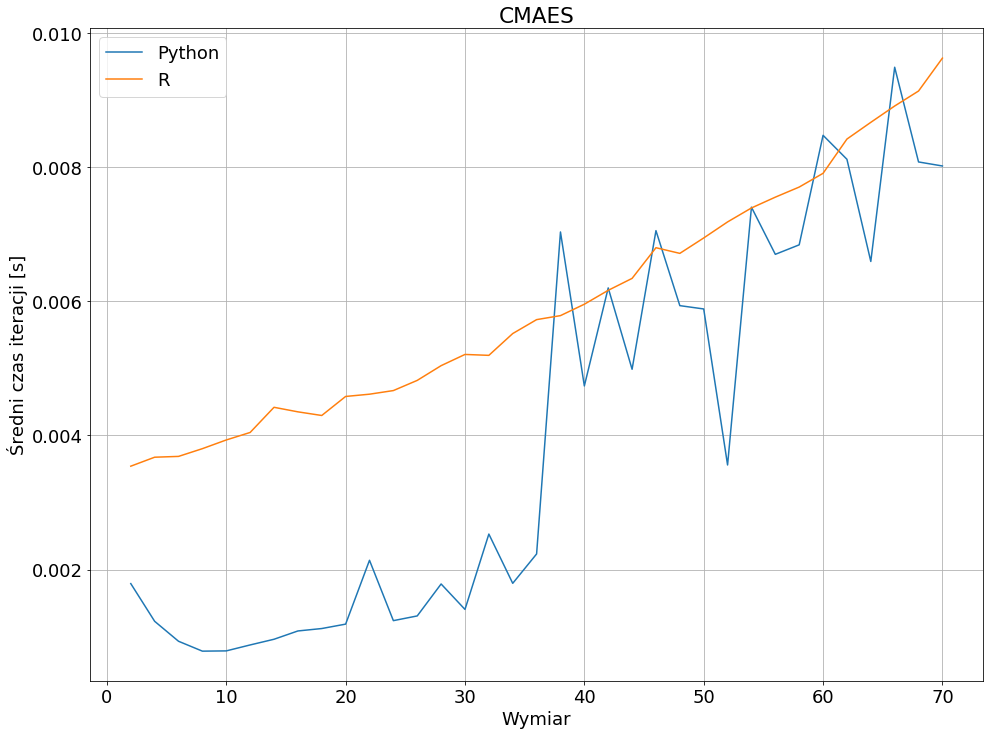

In [7]:
algorithm = 'cmaes'
alg_id = alg_to_int[algorithm]

font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(16, 12))
ax1 = plt.axes()
ax1.set_xlabel('Wymiar')
ax1.set_ylabel('Średni czas iteracji [s]')
ax1.plot(new_dfs[alg_id], '-')
ax1.grid()
ax1.legend(list(new_dfs[alg_id].columns))
ax1.set_title(algorithm.upper())
fig.savefig(f'figs\\iter_per_dim_{algorithm}.png')

# Losowe punkty

In [110]:
# python dfs
py = pd.read_csv("py_mean_time_point.csv",index_col=0)

# r dfs
r = pd.read_csv("r_mean_time_per_dim_point.csv")

In [115]:
df = py.set_index('Dim').join(r.set_index('Dim'))
df = df[1:]
df

,Python,R
Dim,,
2,0.001412,0.001042
4,0.002390,0.001247
6,0.003308,0.001667
8,0.004040,0.001730
10,0.004918,0.001971
12,0.006013,0.001876
14,0.006972,0.002551
16,0.008037,0.002826
18,0.008078,0.002942


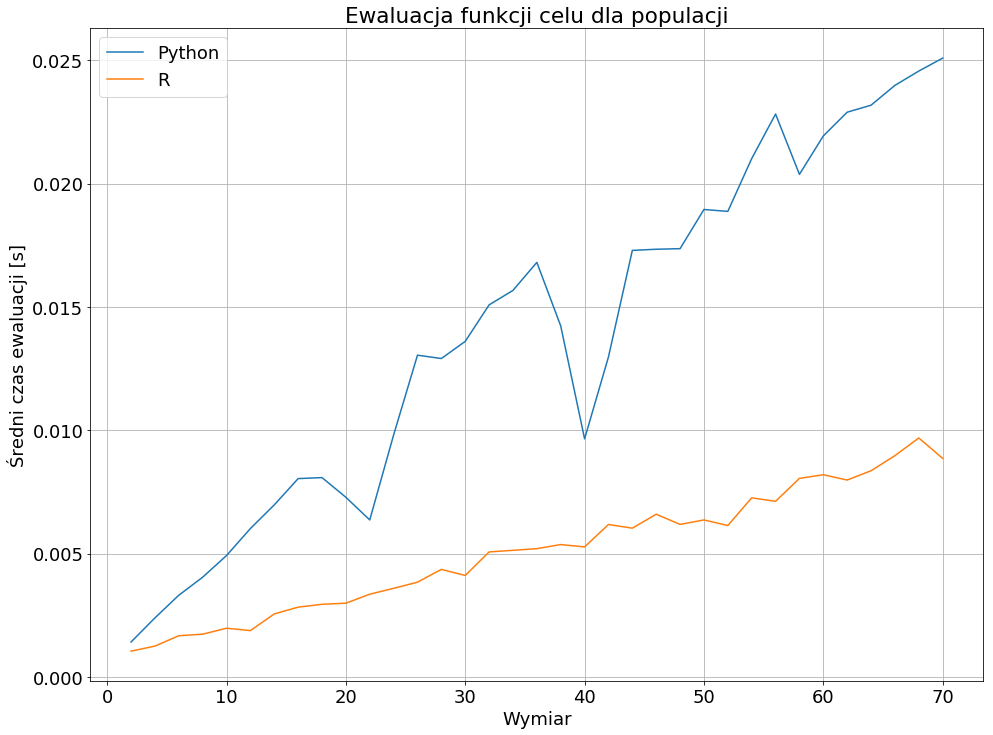

In [117]:
font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(16, 12))
ax1 = plt.axes()
ax1.set_xlabel('Wymiar')
ax1.set_ylabel('Średni czas ewaluacji [s]')
ax1.plot(df, '-')
ax1.grid()
ax1.legend(list(new_dfs[alg_id].columns))
ax1.set_title('Ewaluacja funkcji celu dla populacji')
fig.savefig(f'figs\\iter_per_dim_point.png')

# Wykresy pamięci

In [1]:
dims = [2,10,50,100,200]
cmaes_p = [66.0, 66.1, 66.6, 69.2, 71.3]
cmaes_r = [101.9, 100.6, 105.2, 110.3, 129.1]
de_p = [65.5, 65.6, 65.8, 65.5, 67.3]
de_r = [94.6, 95.1, 102.7, 104.5, 105.7]
des_p = [65.2, 66.2, 68.1, 74.2, 116.9]
des_r = [101.2, 108.2, 129.1, 156.4, 186.8]

In [8]:
df = pd.DataFrame(data={'CMA-ES python': cmaes_p,
                        'CMA-ES R': cmaes_r,
                        'DE python': de_p,
                        'DE R': de_r,
                        'DES python': des_p,
                        'DES R': des_r,
                       }, index=dims)

In [9]:
df

,CMA-ES python,CMA-ES R,DE python,DE R,DES python,DES R
2,66.0,101.9,65.5,94.6,65.2,101.2
10,66.1,100.6,65.6,95.1,66.2,108.2
50,66.6,105.2,65.8,102.7,68.1,129.1
100,69.2,110.3,65.5,104.5,74.2,156.4
200,71.3,129.1,67.3,105.7,116.9,186.8


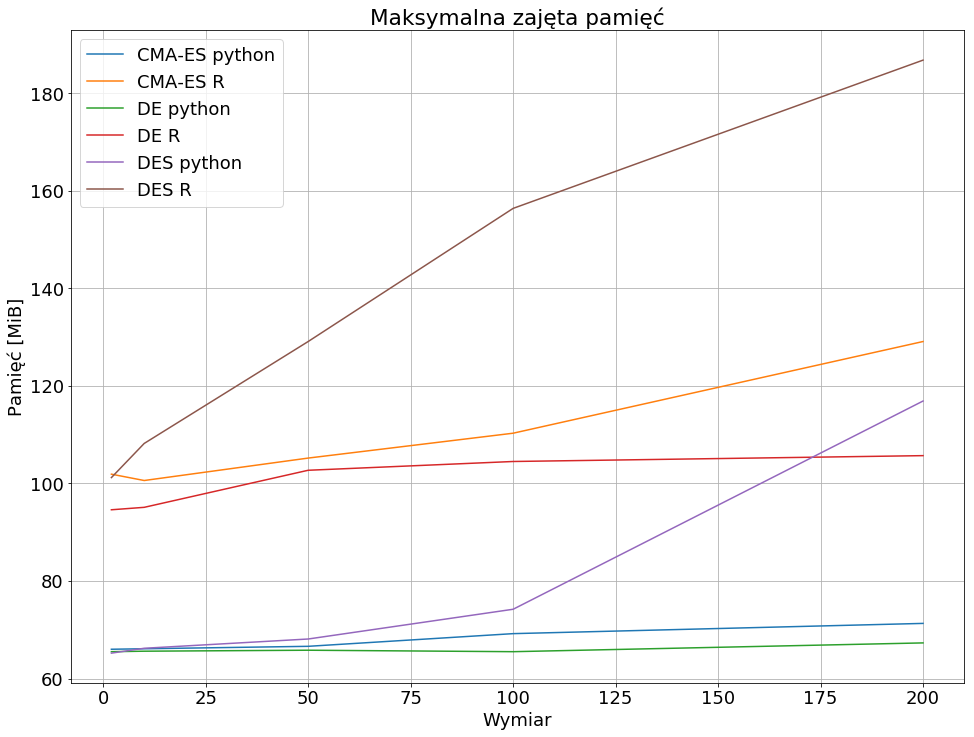

In [11]:
font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(16, 12))
ax1 = plt.axes()
ax1.set_xlabel('Wymiar')
ax1.set_ylabel('Pamięć [MiB]')
ax1.plot(df, '-')
ax1.grid()
ax1.legend(list(df.columns))
ax1.set_title('Maksymalna zajęta pamięć')
fig.savefig(f'figs\\memory.png')